In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [20]:
dataset = pd.read_csv("data.csv");
dataset.head()

,Height,Weight,Arm Circumference,Chest Circumference,Shoulder Circumference,Waist Circumference,Leg Circumference,Level
0,180,70,36,100,42,80,50,**Normal**
1,165,60,34,90,40,70,45,**Normal**
2,170,80,38,110,45,90,55,**Advance**
3,155,50,32,80,35,60,40,**Beginner**
4,175,75,40,105,42,85,50,**Normal**


In [21]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [23]:

y_pred = classifier.predict(X_test)

probs_y=classifier.predict_proba(X_test)

probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)


y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
**Beginner** | **Beginner** | 0.0        | 0.99          | 0.01      
**Advance** | **Advance** | 0.92       | 0.0           | 0.08      
**Beginner** | **Beginner** | 0.0        | 1.0           | 0.0       
**Advance** | **Advance** | 1.0        | 0.0           | 0.0       
**Advance** | **Advance** | 1.0        | 0.0           | 0.0       
**Advance** | **Advance** | 0.93       | 0.0           | 0.07      
**Normal** | **Advance** | 0.85       | 0.0           | 0.15      
**Advance** | **Advance** | 1.0        | 0.0           | 0.0       
**Beginner** | **Beginner** | 0.0        | 1.0           | 0.0       
**Beginner** | **Beginner** | 0.0        | 1.0           | 0.0       
**Normal** | **Normal** | 0.0        | 0.05          | 0.95      
**Beginner** | **Beginner** | 0.0        | 0.66          | 0.33      
**Normal** | **Advance** | 0.85       | 0.0

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  0  0]
 [ 0 10  1]
 [ 3  1  5]]


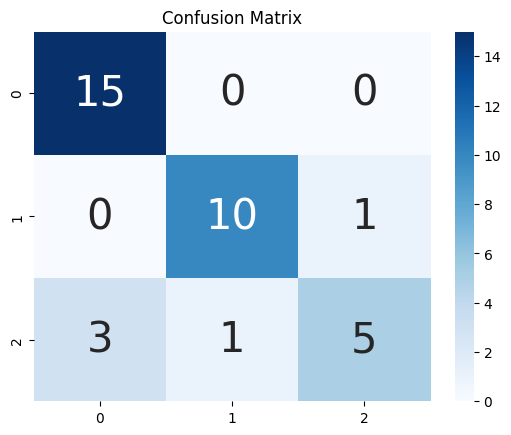

In [25]:

import seaborn as sns
import pandas as pd

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()